## Cargar los datos

In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

input_file_smart = '../simulation_results/smart_matrix.json'
input_file_standard = '../simulation_results/standard_matrix.json'

with open(input_file_smart, 'r') as f:
    data_smart = json.load(f)
with open(input_file_standard, 'r') as f:
    data_standard = json.load(f)
    
df_smart = []
for i in data_smart: 
    df_cars = pd.DataFrame({"cars_delay": i['cars_delay'], "cars_semaphore_delay": i['cars_semaphore_delay']})
    df_walkers = pd.DataFrame({"walkers_delay": i['walkers_delay'], "walkers_semaphore_delay": i['walkers_semaphore_delay']})
    df_smart.append([df_cars, df_walkers])

df_standard = []
for i in data_standard: 
    df_cars = pd.DataFrame({"cars_delay": i['cars_delay'], "cars_semaphore_delay": i['cars_semaphore_delay']})
    df_walkers = pd.DataFrame({"walkers_delay": i['walkers_delay'], "walkers_semaphore_delay": i['walkers_semaphore_delay']})
    df_standard.append([df_cars, df_walkers])

In [3]:
pd.set_option('display.float_format', '{:.3f}'.format)
for i in df_smart:
    print(i[0].describe())

       cars_delay  cars_semaphore_delay
count     339.000               339.000
mean      711.198               423.584
std       709.072               430.276
min         1.000                 0.000
25%       253.000               139.000
50%       536.000               316.000
75%       883.500               545.500
max      6308.000              3741.000
       cars_delay  cars_semaphore_delay
count     313.000               313.000
mean      740.652               444.259
std       649.189               399.040
min         3.000                 0.000
25%       274.000               158.000
50%       578.000               343.000
75%      1033.000               611.000
max      5573.000              3442.000
       cars_delay  cars_semaphore_delay
count     349.000               349.000
mean      762.287               458.788
std       700.777               432.340
min         5.000                 0.000
25%       256.000               151.000
50%       533.000               323.000


In [4]:
pd.set_option('display.float_format', '{:.3f}'.format)
df_walkers.describe()

,walkers_delay,walkers_semaphore_delay
count,1011.000,1011.000
mean,299.290,60.398
std,221.095,48.095
min,1.000,0.000
25%,144.000,27.000
50%,243.000,48.000
75%,405.000,83.000
max,2123.000,464.000


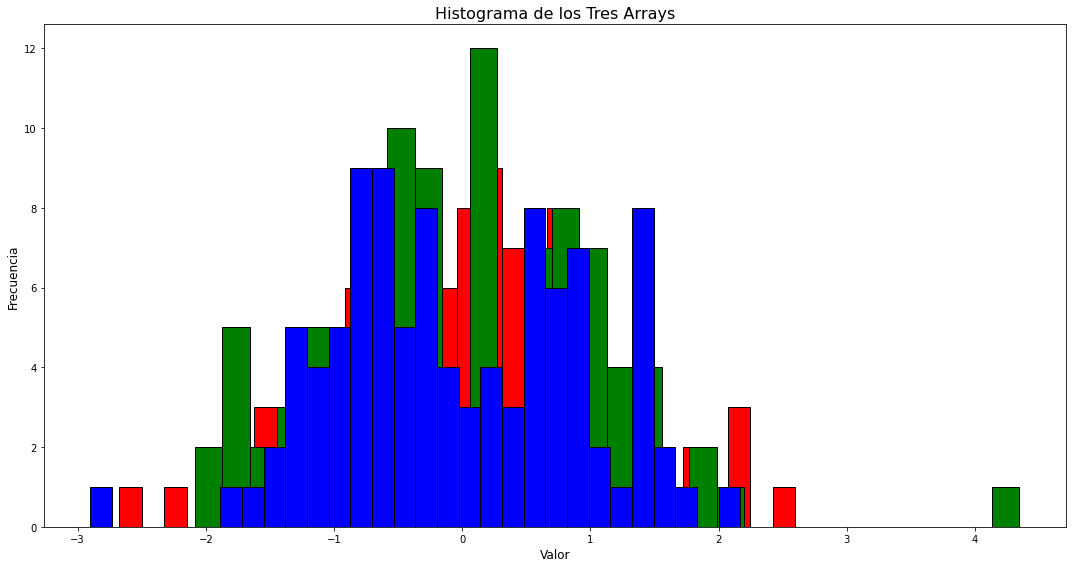

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tenemos tres arrays
array1 = np.random.randn(100)
array2 = np.random.randn(100)
array3 = np.random.randn(100)

# Combinar los tres arrays en una lista
arrays = [array1, array2, array3]

# Definir colores para cada array
colors = ['red', 'green', 'blue']

# Crear un histograma
plt.figure(figsize=(15, 8))

# Para cada array, calcula el histograma y lo añade al mismo gráfico
for i, arr in enumerate(arrays):
    plt.hist(arr, bins=30, color=colors[i], edgecolor='black', label=f'Array {i+1}')

# Configurar el título y los ejes
plt.title('Histograma de los Tres Arrays', fontsize=16)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Ajustar la posición del gráfico para mayor separación
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
for i in range(len([1])):
    df_cars_smart = df_smart[i][0]
    df_cars_standard = df_standard[i][0]
    columns_to_plot = [col for col in df_cars.columns]
    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(800, len(columns_to_plot)*100))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(df_standard) + 1))
    for index, col in enumerate(columns_to_plot):
        plots = [df_cars_smart[col]]
        for j in df_standard:
            plots.append(j[0][col])
        # df_cars_smart[col].hist(bins=30, ax=axes[i])
        # df_cars_standard[col].hist(bins=30, ax=axes[i], edgecolor='black')
        axes[index].hist(plots, bins=30, color=colors, edgecolor='black')
        axes[index].set_title(f'Histogram of {col}')
        axes[index].legend()
        axes[index].set_xlabel('Values')
        axes[index].set_ylabel('Time Frecuency')

    plt.tight_layout()

    plt.show()


plt.show()

No handles with labels found to put in legend.


: 

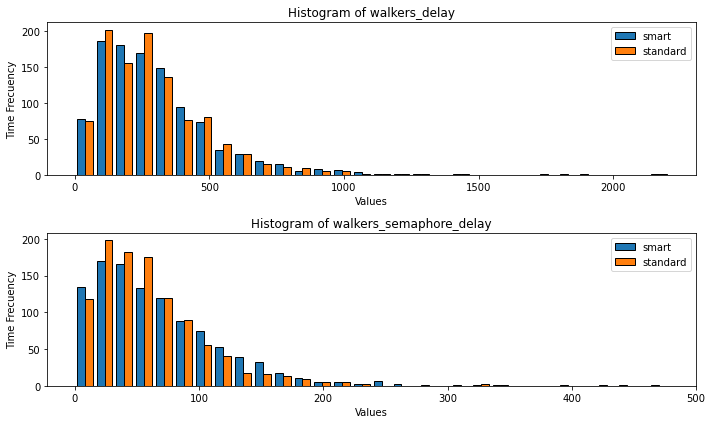

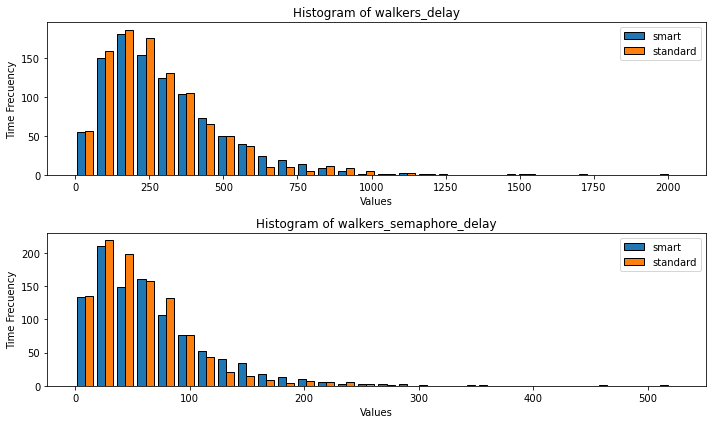

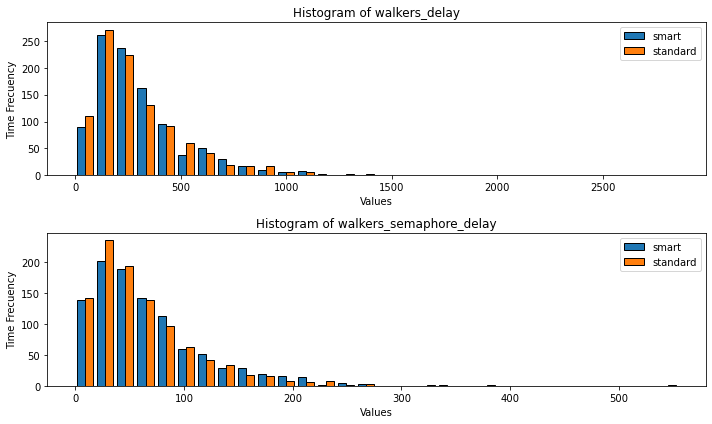

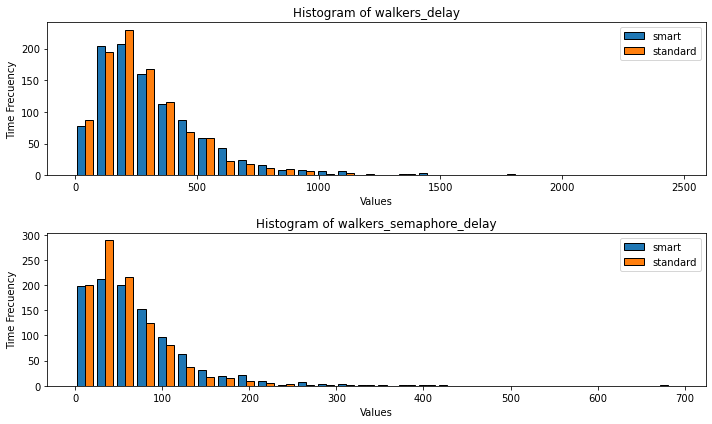

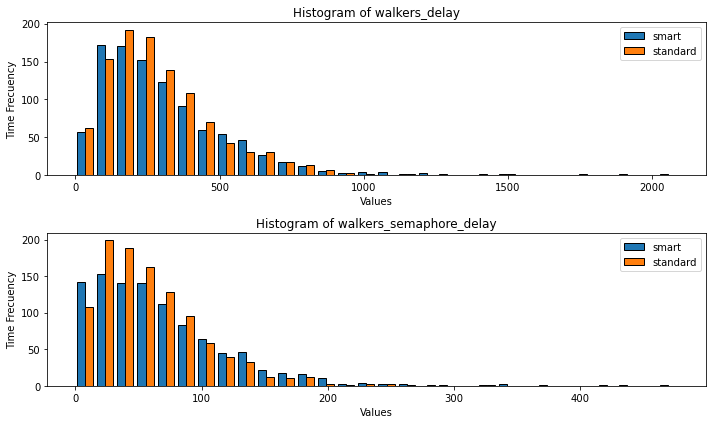

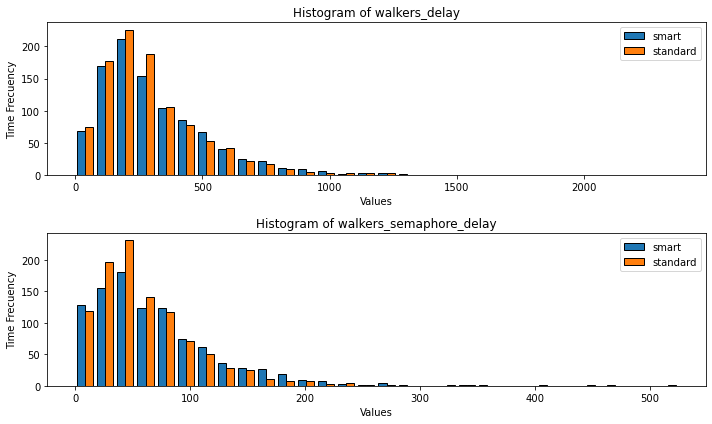

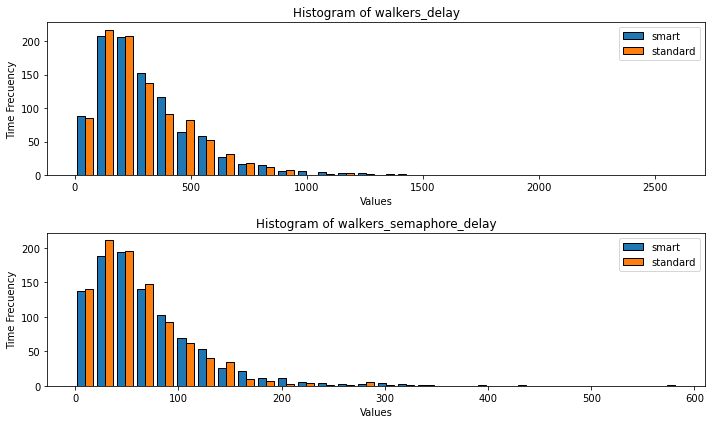

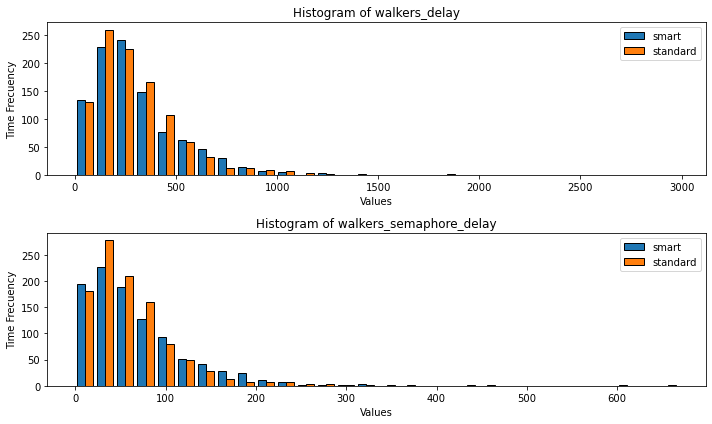

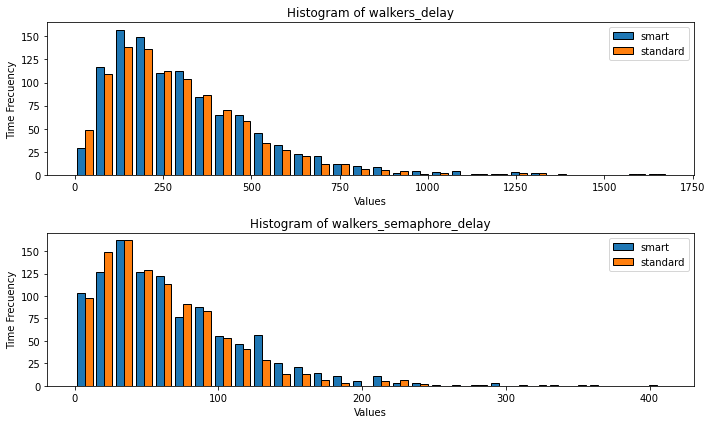

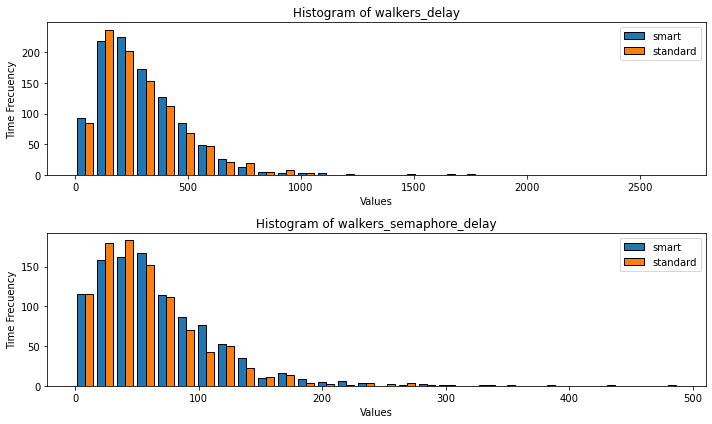

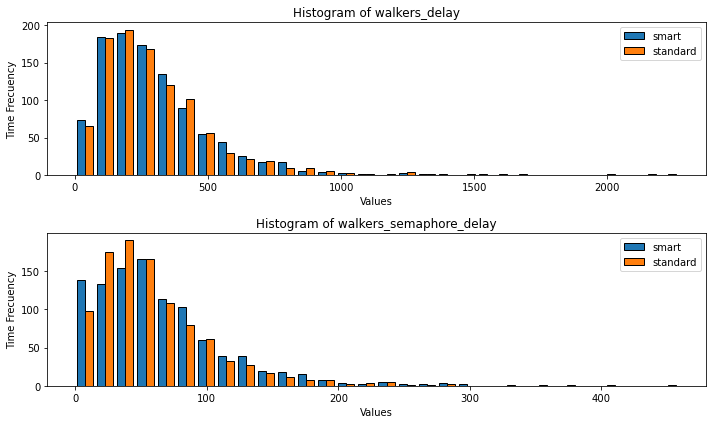

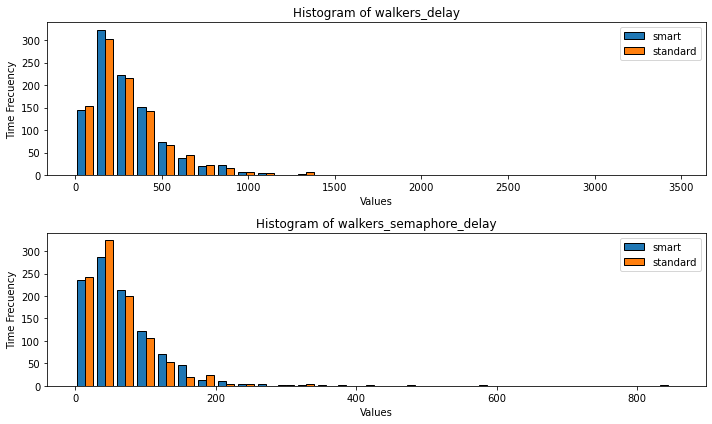

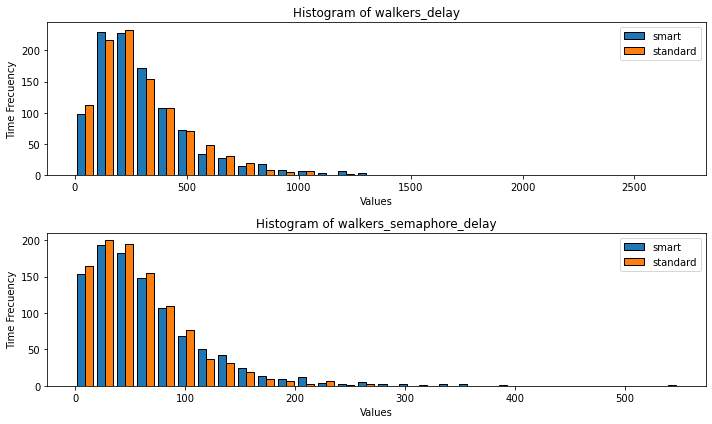

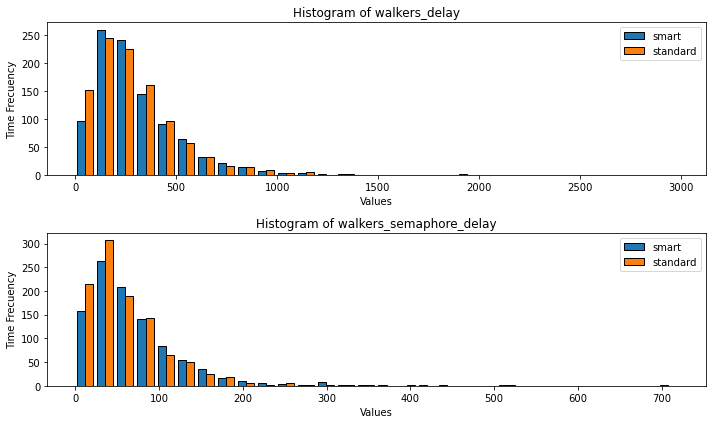

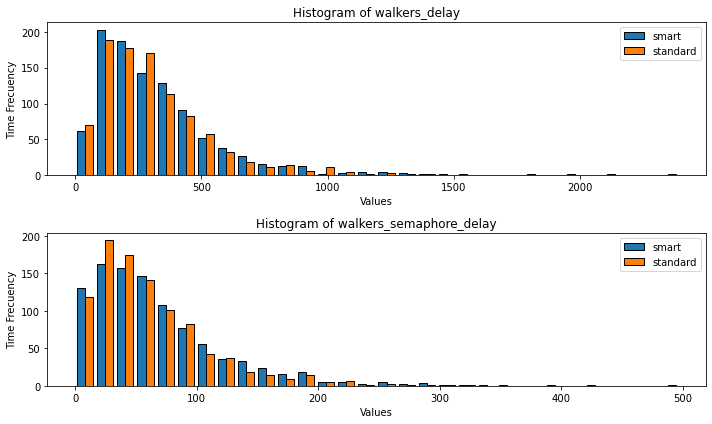

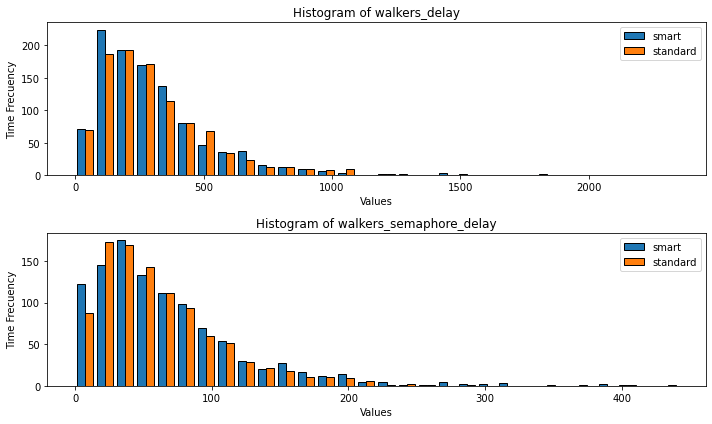

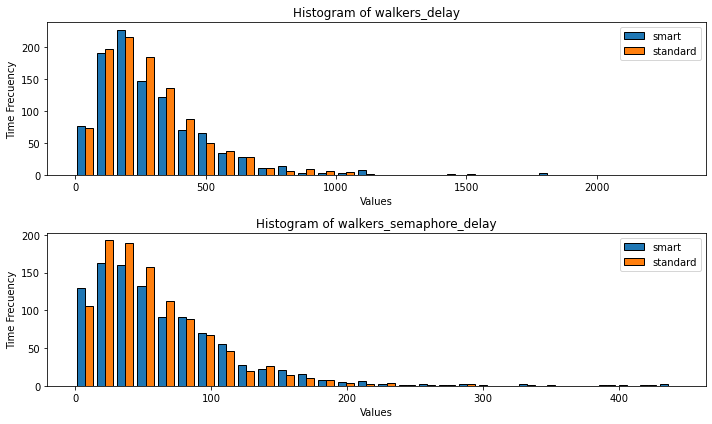

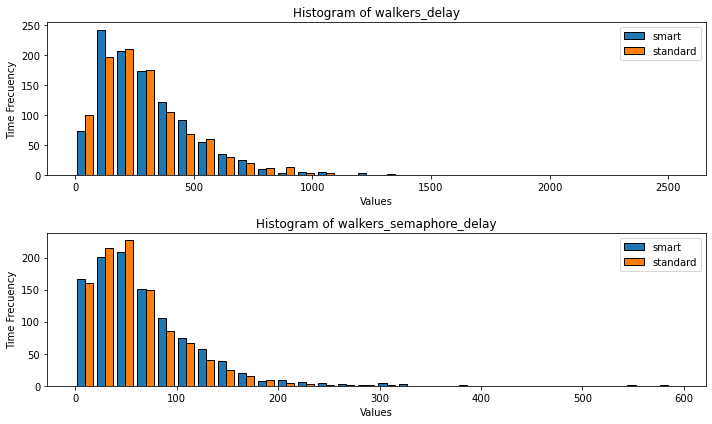

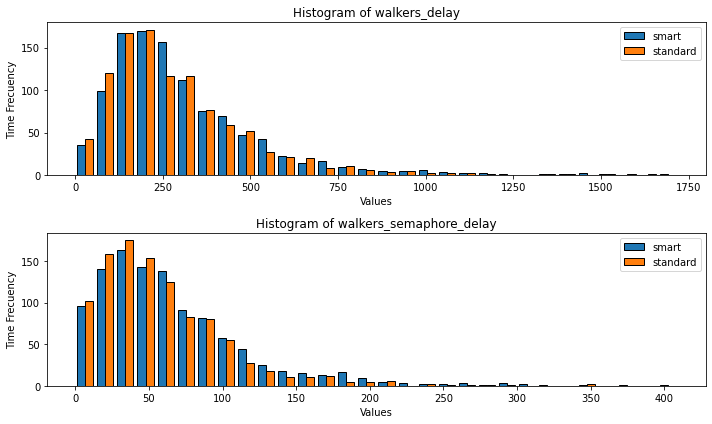

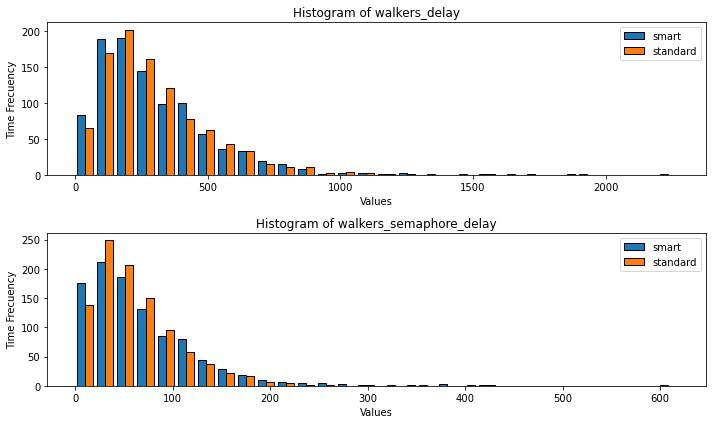

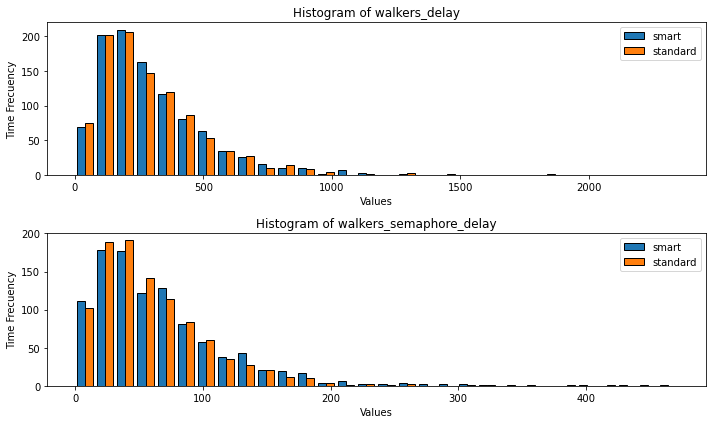

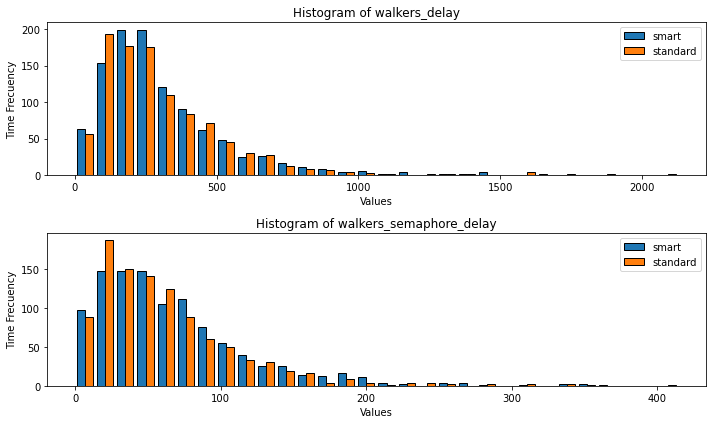

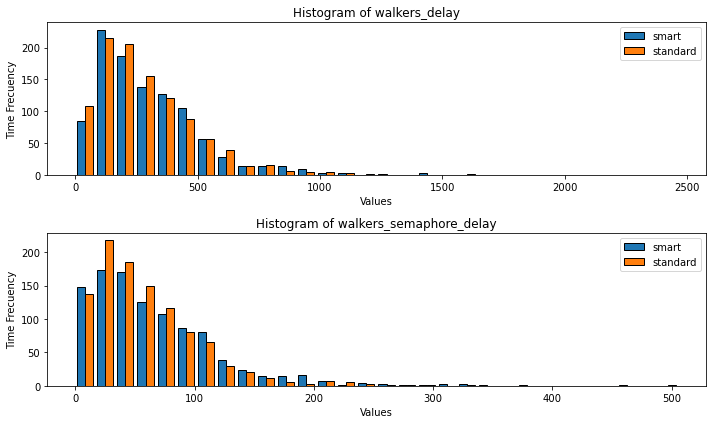

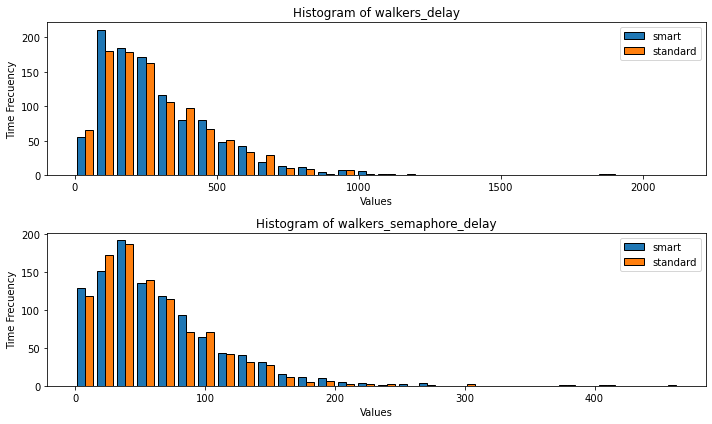

In [ ]:
for i in range(np.max([len(df_smart), len(df_standard)])):
    df_walkers_smart = df_smart[i][1]
    df_walkers_standard = df_standard[i][1]
    columns_to_plot = [col for col in df_walkers.columns]
    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, len(columns_to_plot)*3))

    for i, col in enumerate(columns_to_plot):
        # walkers_smart[col].hist(bins=30, ax=axes[i])
        # walkers_standard[col].hist(bins=30, ax=axes[i], edgecolor='black')
        axes[i].hist([df_walkers_smart[col], df_walkers_standard[col]], bins=30, edgecolor='black')
        axes[i].legend(["smart", "standard"])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Time Frecuency')

    plt.tight_layout()

    plt.show()


plt.show()

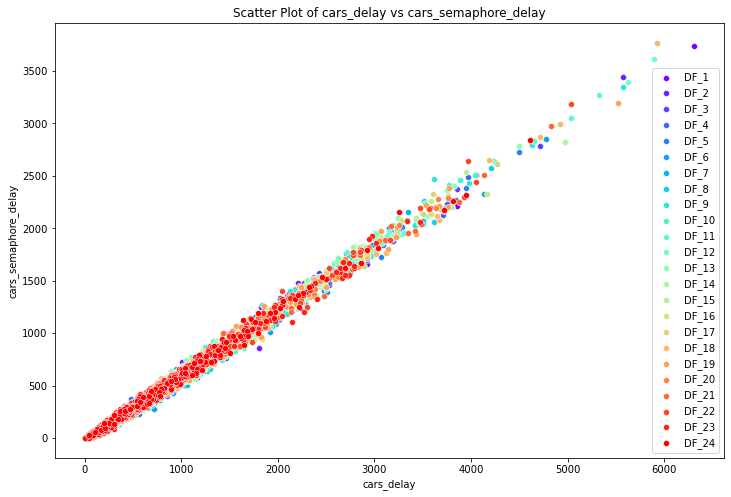

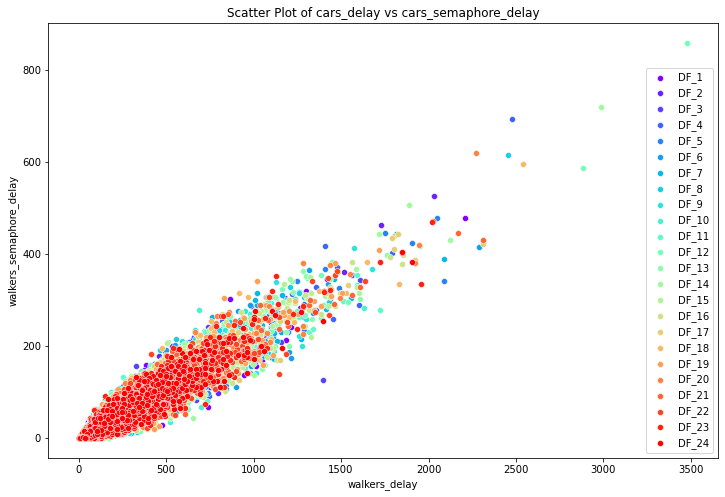

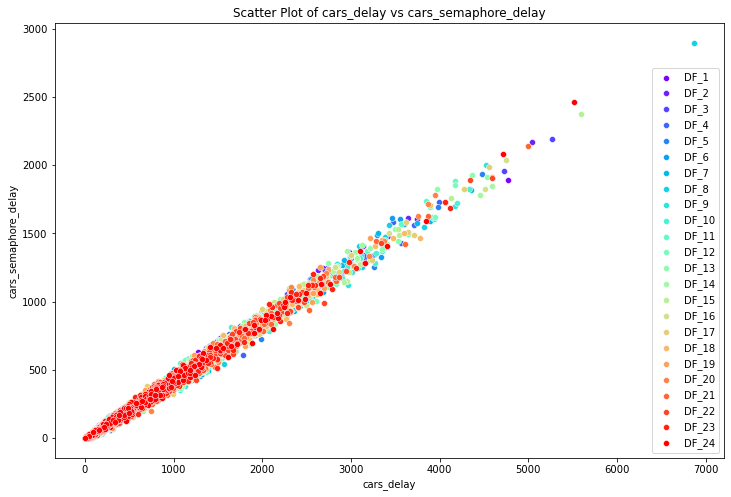

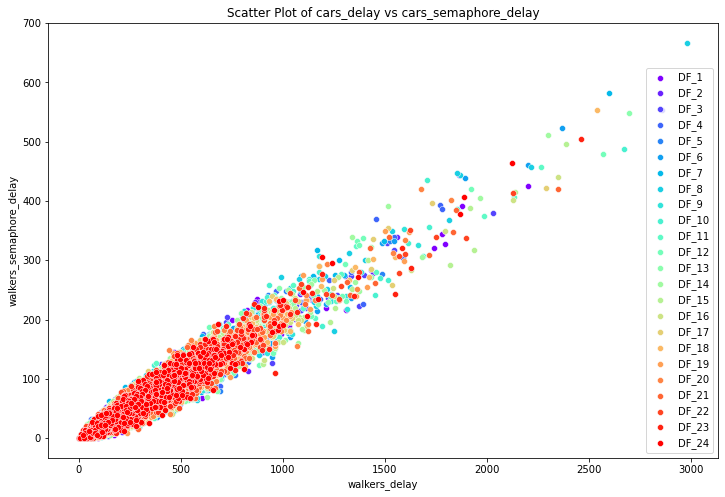

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes múltiples DataFrames en una lista llamada df_list
def draw_scatterplot(df_list, index):
    # Determina el número máximo de series para usar colores diferentes
    max_series = len(df_list)
    colors = plt.cm.rainbow(np.linspace(0, 1, max_series))

    plt.figure(figsize=(12, 8))
    for i, df in enumerate(df_list):
        if index == 0:
            sns.scatterplot(x='cars_delay', y='cars_semaphore_delay', data=df[index], label=f'DF_{i+1}', color=colors[i])
        if index == 1:
            sns.scatterplot(x='walkers_delay', y='walkers_semaphore_delay', data=df[index], label=f'DF_{i+1}', color=colors[i])
            # print(df)

    plt.title('Scatter Plot of cars_delay vs cars_semaphore_delay')
    if index == 0:
        plt.xlabel('cars_delay')
        plt.ylabel('cars_semaphore_delay')
    else:
        plt.xlabel('walkers_delay')
        plt.ylabel('walkers_semaphore_delay')

    # Agrega leyenda
    plt.legend()

    plt.show()

draw_scatterplot(df_smart, 0)
draw_scatterplot(df_smart, 1)
draw_scatterplot(df_standard, 0)
draw_scatterplot(df_standard, 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrices(df_list, index):
    num_grids = int(len(df_list)**0.5) + 1
    fig, axs = plt.subplots(num_grids, num_grids, figsize=(num_grids*4, num_grids*4))
    axs = axs.flatten()

    for i, df in enumerate(df_list):
        correlation_matrix = df[index].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axs[i])
        axs[i].set_title(f'Matriz de correlación para ')

    plt.tight_layout()
    plt.show()

# Usa la función con tus DataFrames
plot_correlation_matrices(df_smart, 0)
plot_correlation_matrices(df_smart, 1)
plot_correlation_matrices(df_standard, 0)
plot_correlation_matrices(df_standard, 1)

In [ ]:
import numpy as np
from scipy import stats
from statsmodels.formula.api import glm


# Simulaciones para cada grupo
simulations_per_group = 24

values = [[0 for _ in range(len(df_smart))] for _ in range(len(df_standard))]

for i in range(len(df_smart)):
    for j in range(len(df_standard)):
        sm = df_smart[i]
        st = df_standard[j]
        grupo1_array = sm[0]['cars_delay'].values
        grupo2_array = st[0]['cars_delay'].values

        post_hoc = stats.tukey_hsd(grupo1_array.flatten(), grupo2_array.flatten())
        p_value = post_hoc.pvalue
        values[i][j] = p_value[0][1]


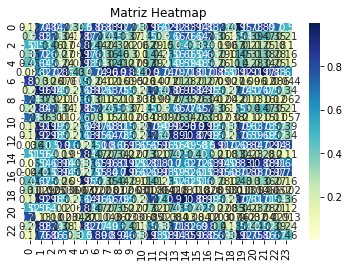

24

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Crea un DataFrame con la matriz
df = pd.DataFrame(values)

# Usa seaborn para crear una heatmap
sns.heatmap(df, annot=True, cmap="YlGnBu")
plt.title('Matriz Heatmap')
plt.show()
len(df_standard)

In [ ]:
from scipy import stats

# Supongamos que tenemos dos arrays con nuestros datos
data1 = [1, 2, 3, 4, 5]
data2 = [2, 3, 4, 5, 6]

# Calcula el estadístico T
min_length = min(len(df_smart[0][0]['cars_delay']), len(df_standard[0][0]['cars_delay']))
data1 = df_smart[0][0]['cars_delay'][:min_length]
data2 = df_standard[0][0]['cars_delay'][:min_length]

t_statistic, p_value = stats.wilcoxon(data1, data2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Si el p-value es menor que un nivel de significancia (por ejemplo, 0.05),
# podemos rechazar la hipótesis nula y concluir que las muestras provienen de poblaciones diferentes.

T-statistic: 26657.0
P-value: 0.232070364465497


In [ ]:
import pandas as pd
import numpy as np

filas_seleccionadas = df_standard 
means_cars_standard = []
means_walkers_standard = []
means_cars_smart = []
means_walkers_smart = []

for i in df_standard:
    mean1 = i[0].mean()
    mean2 = i[1].mean()
    means_cars_standard.append(mean1)
    means_walkers_standard.append(mean2)

for i in df_smart:
    mean1 = i[0].mean()
    mean2 = i[1].mean()
    means_cars_smart.append(mean1)
    means_walkers_smart.append(mean2)

print(np.mean(means_cars_standard), np.mean(means_cars_smart))
print(np.mean(means_walkers_standard), np.mean(means_walkers_smart))
 

501.8559776897251 594.833997640204
181.16367164809836 188.0363491971402
